# Take a look at some of the population distribution

These are directly queried from the production database as of 3/27/2025

# Import libaries

In [1]:
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Helper Function

In [2]:
def plot_bar(data, cat_col, count_col, title, xlabel, ylabel, size=(18, 6), rotation=90):
    plt.figure(figsize=size)
    sns.barplot(data=data, x=cat_col, y=count_col)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()

# Load datasets

## Docket Entry Distribution by Year

```
\COPY (SELECT EXTRACT(YEAR FROM date_created) AS year, COUNT(*) AS count
FROM search_docketentry
GROUP BY year
ORDER BY count DESC) to '/tmp/entry_year.csv' CSV HEADER;
```

In [3]:
ey = pd.read_csv("population/entry_year.csv")
ey

,year,count
0,2023,159080593
1,2019,63494463
2,2024,37856790
3,2020,36695426
4,2021,32697199
5,2022,31557862
6,2018,28390093
7,2016,15227369
8,2025,7193468
9,2017,6999652


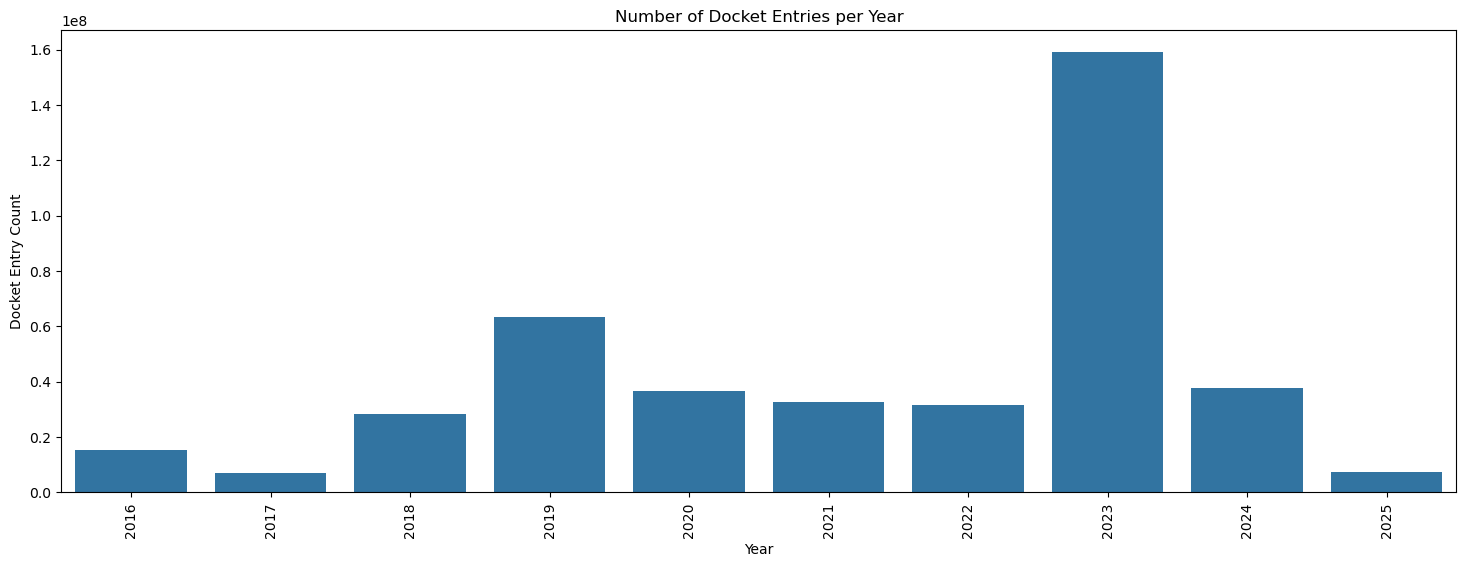

In [4]:
plot_bar(ey, "year", "count", 'Number of Docket Entries per Year', 'Year', 'Docket Entry Count')

## Docket Distribution by Court Name

```
\COPY (SELECT c.short_name AS court_name, COUNT(sde.docket_id) AS count
FROM search_court AS c
JOIN search_docket AS sd ON c.id = sd.court_id
JOIN search_docketentry AS sde ON sd.id = sde.docket_id
GROUP BY c.short_name) to '/tmp/entry_court.csv' CSV HEADER;
```

I did some manual cleaning to extract the state name and circuit name from the court names

In [5]:
ec = pd.read_csv("population/entry_court.csv")
ec

,court_name,count,state_name
0,Alaska Supreme Court,11,Alaska
1,C.D. California,17019607,California
2,C.D. Illinois,2713398,Illinois
3,Colorado Court of Appeals,190,Colorado
4,Court of International Trade,129191,Other
...,...,...,...
112,W.D. Tennessee,7178192,Tennessee
113,W.D. Texas,8208954,Texas
114,W.D. Virginia,1684215,Virginia
115,W.D. Washington,5369394,Washington


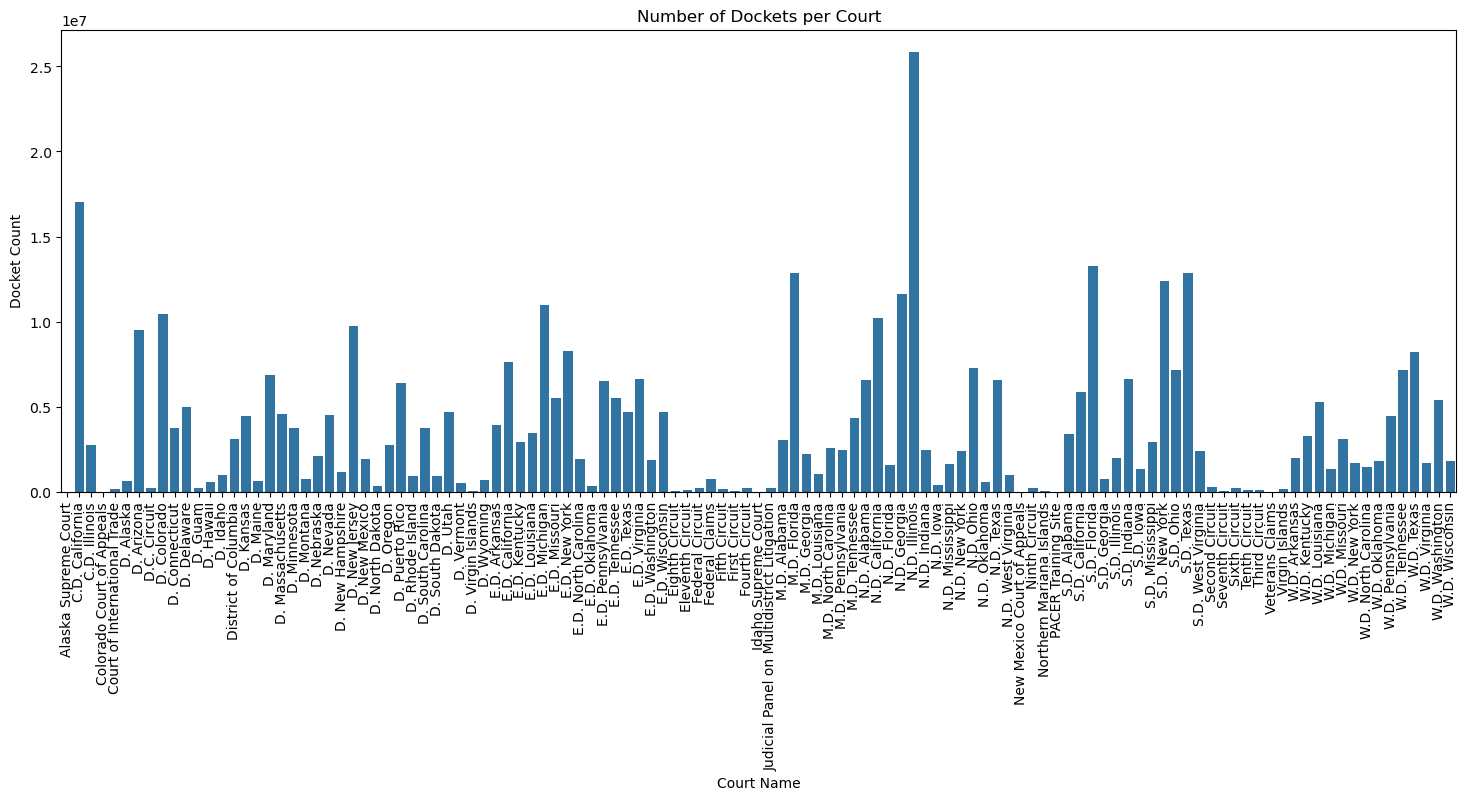

In [6]:
plot_bar(ec, "court_name", "count", 'Number of Dockets per Court', 'Court Name', 'Docket Count')

## Docket Distribution by State

In [7]:
es = ec[~ec['state_name'].str.contains("circuit", case=False, na=False)]
es

,court_name,count,state_name
0,Alaska Supreme Court,11,Alaska
1,C.D. California,17019607,California
2,C.D. Illinois,2713398,Illinois
3,Colorado Court of Appeals,190,Colorado
4,Court of International Trade,129191,Other
...,...,...,...
112,W.D. Tennessee,7178192,Tennessee
113,W.D. Texas,8208954,Texas
114,W.D. Virginia,1684215,Virginia
115,W.D. Washington,5369394,Washington


In [8]:
es = es.groupby('state_name', as_index=False)['count'].sum()
es

,state_name,count
0,Alabama,12996209
1,Alaska,644937
2,Arizona,9477870
3,Arkansas,5853371
4,California,40725995
5,Colorado,10421267
6,Connecticut,3726417
7,DC,3327109
8,Delaware,4988773
9,Federal Claims,758486


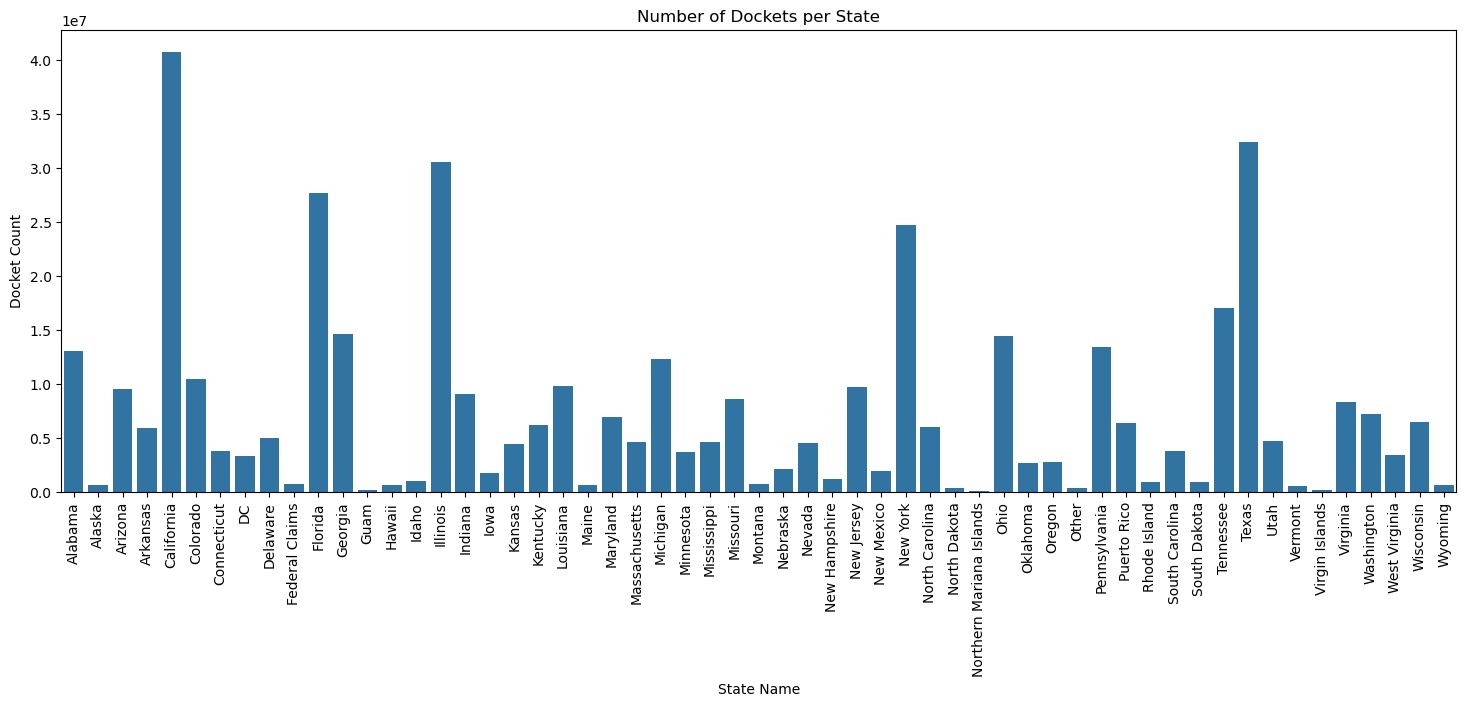

In [9]:
plot_bar(es, "state_name", "count", 'Number of Dockets per State', 'State Name', 'Docket Count')

## Docket Distribution by Circuit

In [10]:
eci = ec[ec['state_name'].str.contains("circuit", case=False, na=False)]
eci

,court_name,count,state_name
51,Eighth Circuit,57518,Eighth Circuit
52,Eleventh Circuit,117290,Eleventh Circuit
53,Federal Circuit,182990,Federal Circuit
55,Fifth Circuit,124016,Fifth Circuit
56,First Circuit,55700,First Circuit
57,Fourth Circuit,226608,Fourth Circuit
81,Ninth Circuit,227811,Ninth Circuit
96,Second Circuit,243016,Second Circuit
97,Seventh Circuit,56919,Seventh Circuit
98,Sixth Circuit,186094,Sixth Circuit


In [11]:
eci = eci.groupby('state_name', as_index=False)['count'].sum()

order = [
    'First Circuit', 'Second Circuit', 'Third Circuit', 'Fourth Circuit', 'Fifth Circuit',
    'Sixth Circuit', 'Seventh Circuit', 'Eighth Circuit', 'Ninth Circuit', 'Tenth Circuit',
    'Eleventh Circuit', 'Federal Circuit'
]

eci['state_name'] = pd.Categorical(eci['state_name'], categories=order, ordered=True)
eci = eci.sort_values('state_name').reset_index(drop=True)
eci

,state_name,count
0,First Circuit,55700
1,Second Circuit,243016
2,Third Circuit,82792
3,Fourth Circuit,226608
4,Fifth Circuit,124016
5,Sixth Circuit,186094
6,Seventh Circuit,56919
7,Eighth Circuit,57518
8,Ninth Circuit,227811
9,Tenth Circuit,76934


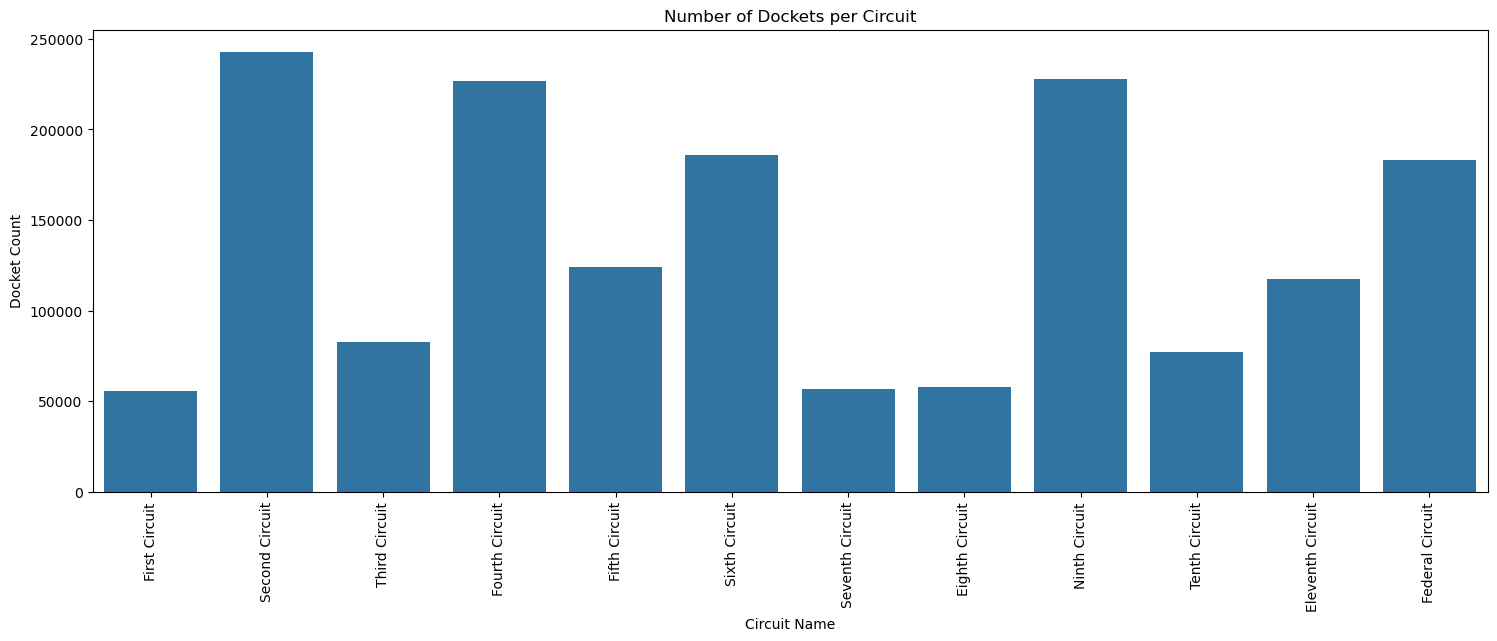

In [12]:
plot_bar(eci, "state_name", "count", 'Number of Dockets per Circuit', 'Circuit Name', 'Docket Count')

## Docket Distribution by Year

```
\COPY (SELECT EXTRACT(YEAR FROM date_created) AS year, COUNT(*) AS count
FROM search_docket
GROUP BY year
ORDER BY count DESC) to '/tmp/docket_year.csv' CSV HEADER;
```

In [13]:
dy = pd.read_csv("population/docket_year.csv")
dy

,year,count
0,2021,33777954
1,2020,10066387
2,2019,8167584
3,2022,4938341
4,2014,2619122
5,2018,2216393
6,2017,1676367
7,2023,1419388
8,2024,1358258
9,2016,1246656


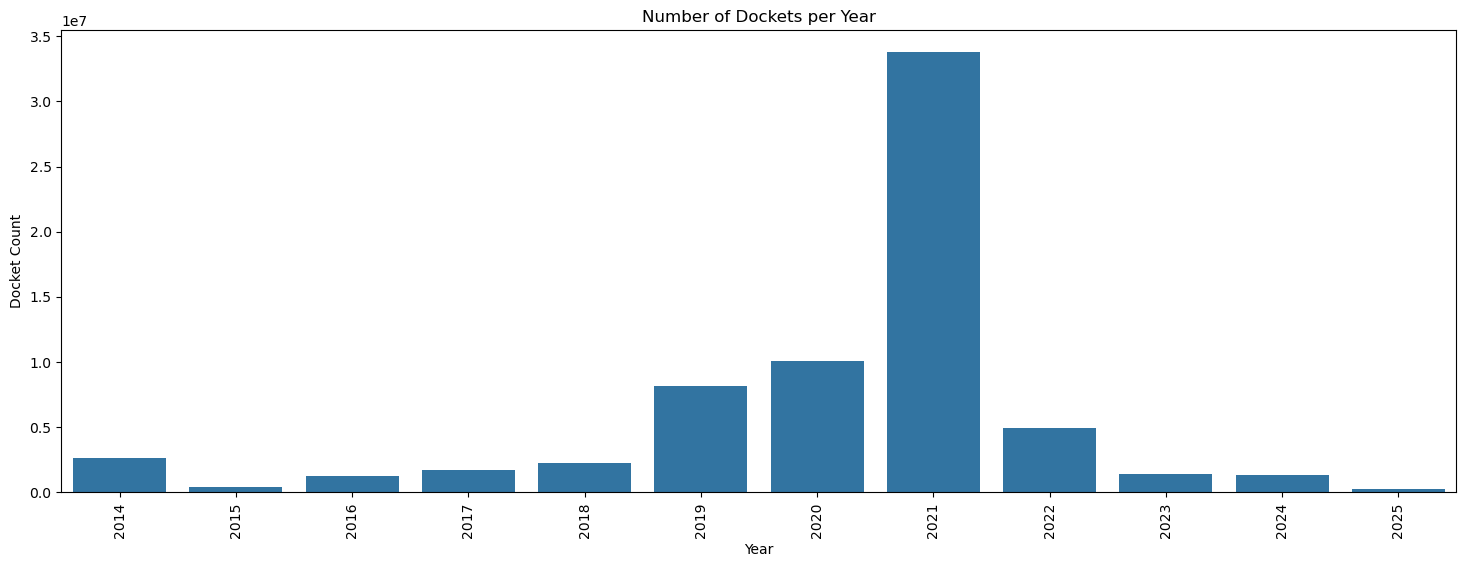

In [14]:
plot_bar(dy, "year", "count", 'Number of Dockets per Year', 'Year', 'Docket Count')

## Docket Distribution by Jurisdiction Type

```
\COPY (SELECT jurisdiction_type, COUNT(*) AS count
FROM search_docket
GROUP BY jurisdiction_type
ORDER BY count DESC) to '/tmp/docket_jurisdiction.csv' CSV HEADER;
```

In [15]:
dj = pd.read_csv("population/docket_jurisdiction.csv")
dj

,jurisdiction_type,count
0,NaN,58200727
1,Federal question,4415653
2,Diversity of citizenship,2372273
3,Government defendant,1226480
4,Federal Question,839125
5,Government plaintiff,560439
6,Diversity,344917
7,U.S. Government Defendant,119029
8,U.S. Government Plaintiff,37968
9,Local question,5802


In [16]:
dj["jurisdiction_type"] = dj["jurisdiction_type"].str.replace("Local question", "Local Question").replace("Federal question", "Federal Question").replace("Federal Question 管辖权：联邦问题", "Federal Question").replace("Federal Question 管辖权： 联邦问题", "Federal Question").replace("Government defendant", "Government Defendant").replace("U.S. Government Defendant", "Government Defendant").replace("Government plaintiff", "Government Plaintiff").replace("U.S. Government Plaintiff", "Government Plaintiff").replace("0", "NaN").replace("6", "NaN").replace("5", "NaN").replace("Diversity of citizenship", "Diversity")

In [17]:
dj = dj.groupby('jurisdiction_type', as_index=False)['count'].sum()
dj

,jurisdiction_type,count
0,Diversity,2717190
1,Federal Question,5254780
2,Government Defendant,1345509
3,Government Plaintiff,598407
4,Local Question,6090
5,NaN,1553


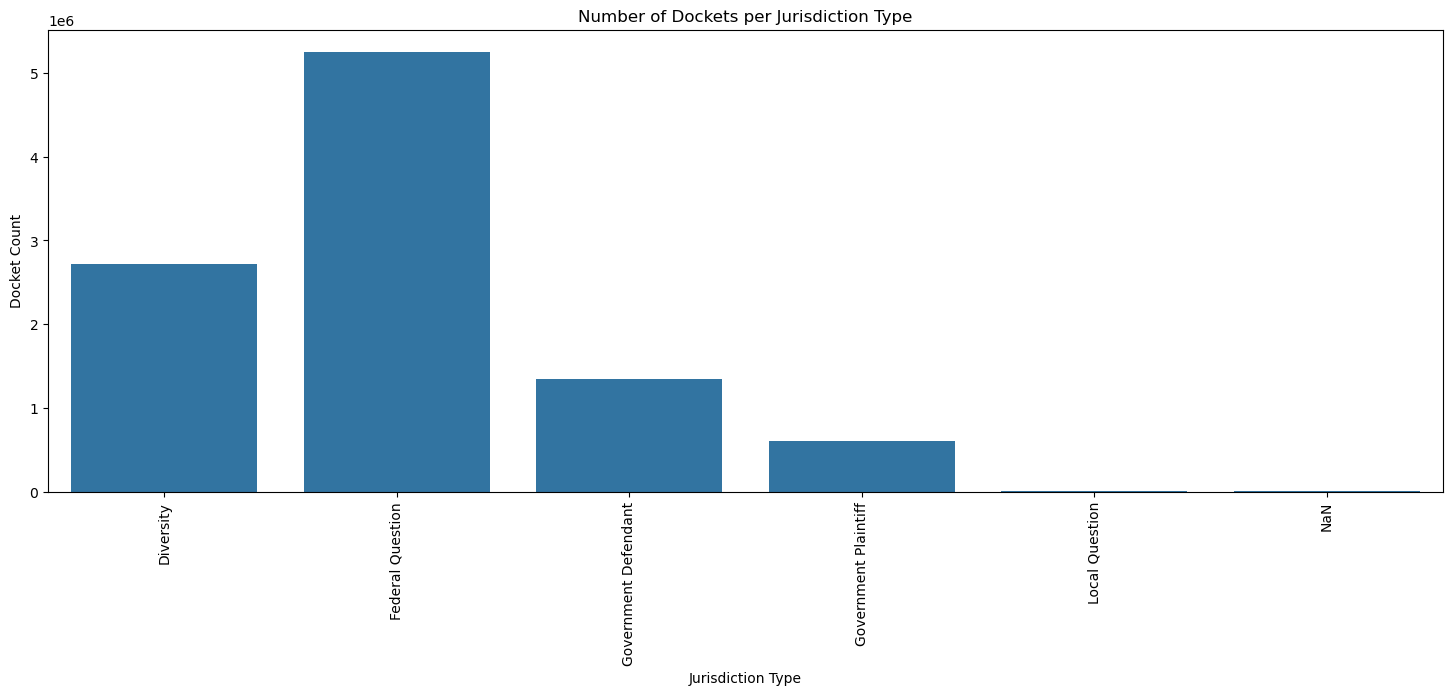

In [18]:
plot_bar(dj, "jurisdiction_type", "count", 'Number of Dockets per Jurisdiction Type', 'Jurisdiction Type', 'Docket Count')